***Задание 1:*** К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

***Задание 2:*** К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

***Задание 3:*** Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

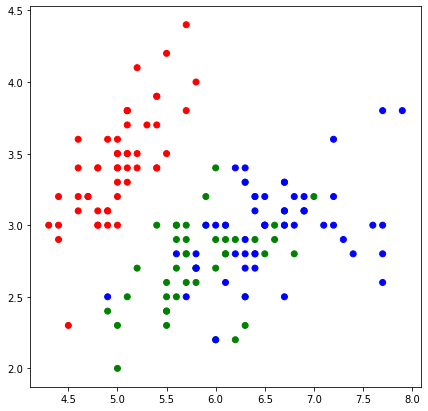

In [23]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [60]:
class OurKnn:
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test, k, q, method):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, self.x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            for index, d in enumerate(sorted(test_distances)[0:k]):
                if (method == 1):
                    classes[d[1]] += q**index 
                else:
                    classes[d[1]] += q**d[0]

            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        return answers
    
    @staticmethod
    def e_metrics(x1, x2):
    
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])

        return np.sqrt(distance)
    

In [42]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [82]:
def get_graph(X_train, y_train, k, q, method):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    knn_model = OurKnn()
    knn_model.fit(X_train, y_train)

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()], k, q, method)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Проверим работу алгоритма при различных k, q и для двух способов определения весов:

method = 1:  $w(i) = q^{i}$,   $q \in (0,1)$

method = 2: $w(d) = q^{d}$,   $q \in (0,1)$

Точность алгоритма 1 при k = 4, q = 1: 0.833


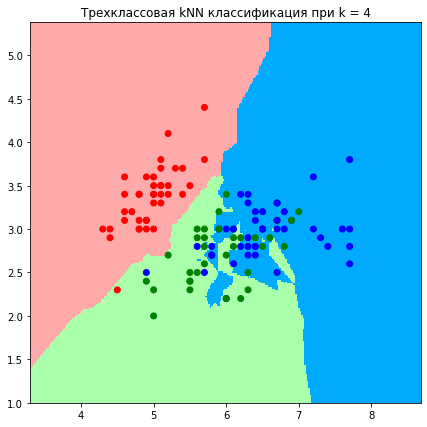

Точность алгоритма 1 при k = 4, q = 0.9: 0.733


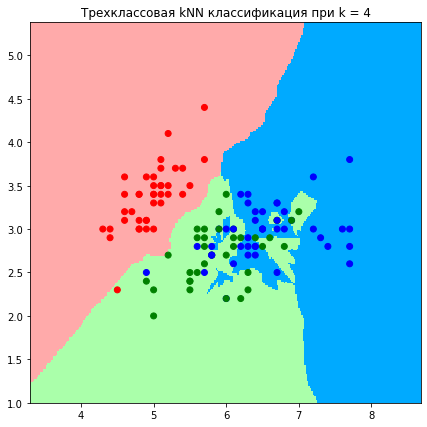

Точность алгоритма 1 при k = 4, q = 0.8: 0.733


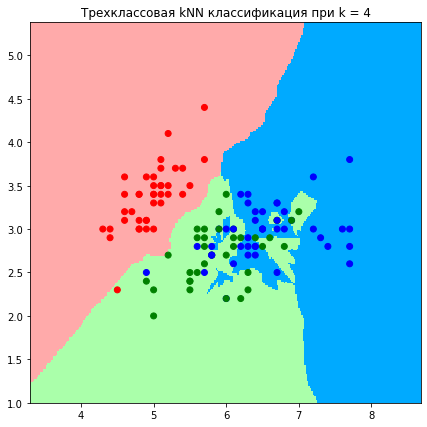

Точность алгоритма 1 при k = 4, q = 0.5: 0.667


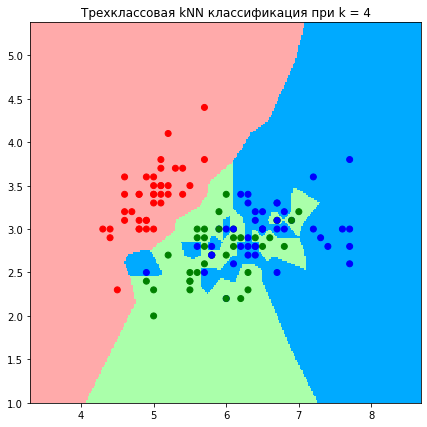

Точность алгоритма 1 при k = 4, q = 0.1: 0.667


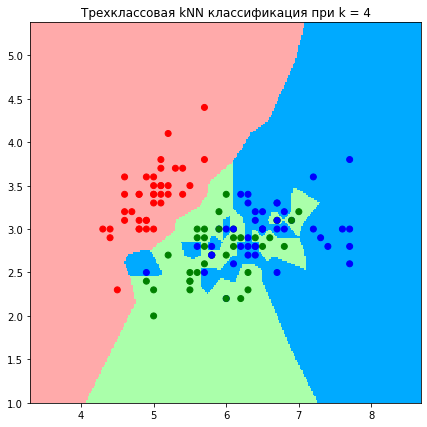

In [92]:
k = 4
knn_model = OurKnn()
knn_model.fit(X_train, y_train)
for q in [1, 0.9, 0.8, 0.5, 0.1]:
    y_pred = knn_model.predict(X_test, k, q, 1)
    print(f'Точность алгоритма 1 при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k, q, 1)

In [84]:
knn_model = OurKnn()
knn_model.fit(X_train, y_train)
all_accuracy=[]
for k in range(10):
    for q in [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.5, 0.1]:
        y_pred = knn_model.predict(X_test, k, q, 1)
        all_accuracy.append((k, q, 1, accuracy(y_pred, y_test)))        

In [87]:
l = max(all_accuracy, key = lambda i: i[3])
print(f'Максимальная точность для метода 1: {l[3]:.3f} достигается при k = {l[0]}, q = {l[1]}')

Максимальная точность для метода 1: 0.867 достигается при k = 5, q = 1


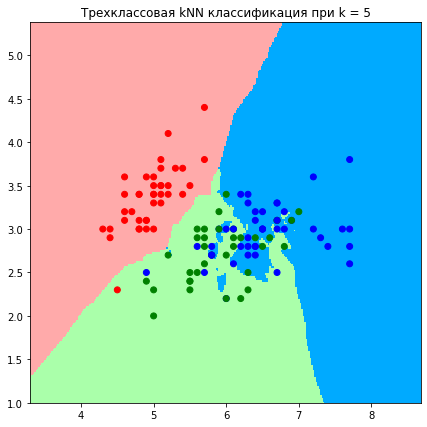

In [86]:
get_graph(X_train, y_train, 5, 1, 1)

Точность алгоритма 2 при k = 4, q = 1: 0.833


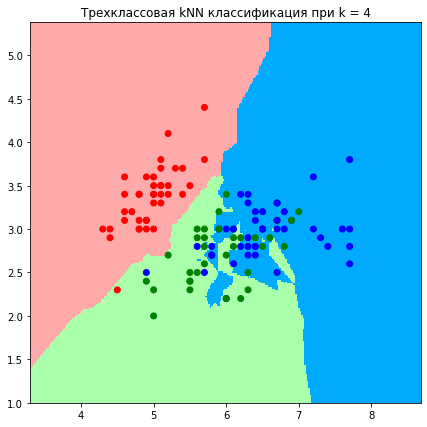

Точность алгоритма 2 при k = 4, q = 0.9: 0.733


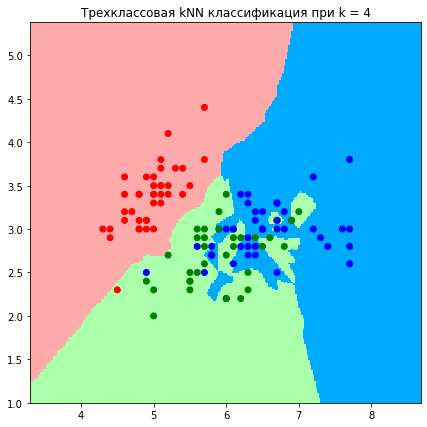

Точность алгоритма 2 при k = 4, q = 0.8: 0.733


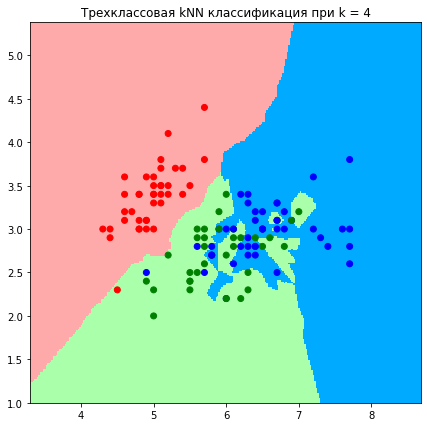

Точность алгоритма 2 при k = 4, q = 0.5: 0.667


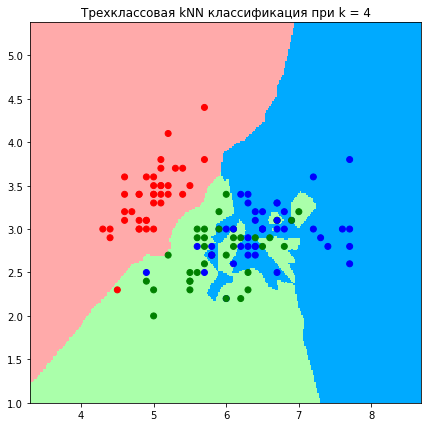

Точность алгоритма 2 при k = 4, q = 0.1: 0.667


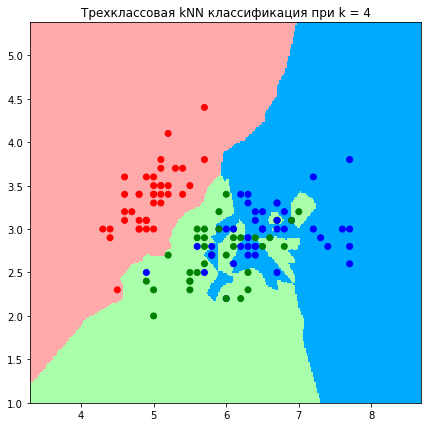

In [93]:
k = 4
knn_model = OurKnn()
knn_model.fit(X_train, y_train)
for q in [1, 0.9, 0.8, 0.5, 0.1]:
    y_pred = knn_model.predict(X_test, k, q, 1)
    print(f'Точность алгоритма 2 при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k, q, 2)

In [88]:
knn_model = OurKnn()
knn_model.fit(X_train, y_train)
all_accuracy=[]
for k in range(10):
    for q in [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.5, 0.1]:
        y_pred = knn_model.predict(X_test, k, q, 2)
        all_accuracy.append((k, q, 2, accuracy(y_pred, y_test)))

In [89]:
l = max(all_accuracy, key = lambda i: i[3])
print(f'Максимальная точность для метода 2: {l[3]:.3f} достигается при k = {l[0]}, q = {l[1]}')

Максимальная точность для метода 2: 0.867 достигается при k = 5, q = 1


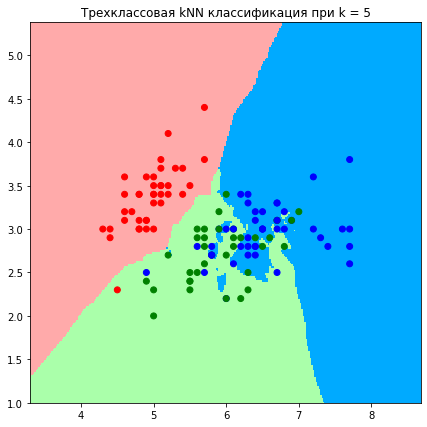

In [90]:
get_graph(X_train, y_train, 5, 0.5, 2)


get_graph(X_train, y_train, 5, 1, 2)

Максимальная точность получилась в модели без учета весов (q = 1) при значении k = 5: при бОльшем значении k графики получаются более сглаженными, однако модель начинает учитывать слишком далеких соседей и точность на тестовой выборке снижается.

Параметр q в бОльшей степени влияет при четных k. В рассмотренных примерах accuracy уменьшалась с уменьшением q.

***Задание 4:*** (опция) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [74]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

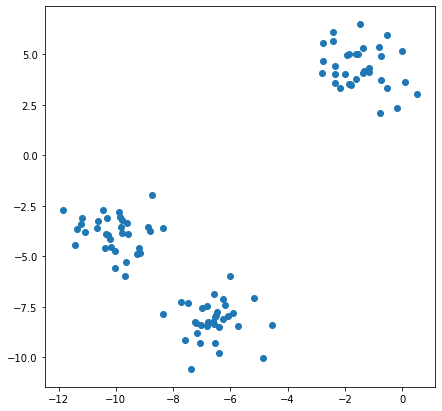

In [75]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [68]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [76]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [77]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

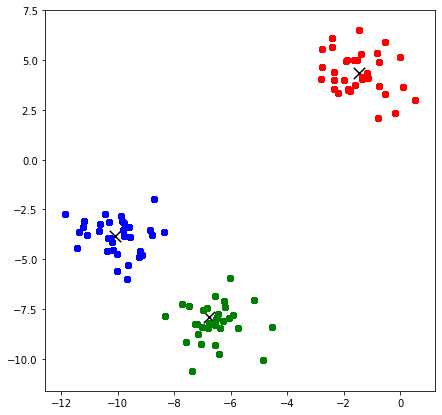

In [78]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

***Функция расчета среднего квадратичного внутриклассового расстояния***

In [79]:
def inner_class_distance(centroids, clusters):
    dist = []
    for claster_item in clusters:
        claster_dist = 0
        for x in clusters[claster_item]:
            claster_dist += e_metrics(x, centroids[claster_item])**2
        dist.append(claster_dist / len(clusters[claster_item]) ) 
    return np.mean(dist)          

In [80]:
inner_class_distance(centroids, clusters)

2.018248203209678

In [83]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

distances = []

def calc_dist(max_limit):
    for k in range(1, max_limit):
        centroids, clusters = kmeans(X, k, max_iterations, min_distance)
        distances.append(inner_class_distance(centroids, clusters))
        
calc_dist(11)

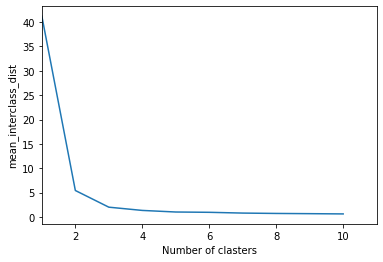

In [84]:
plt.xlabel(f'Number of clasters')
plt.ylabel('mean_interclass_dist')
plt.xlim(1, 11)
plt.plot(list(range(1, 11)), distances)
plt.show()

***Вывод:*** По правилу "локтя" количество кластеров, на которые нужно разбивать равно трем.